In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def generator(o0):
    oS = 2*np.pi*8192

    n = np.arange(8192)
    xn = np.sin(o0*n/8192)
    
    return xn, n

In [88]:
xn, n = generator(2*np.pi*5500)
print(xn[:8192])

[ 0.         -0.88047089  0.83486287 ... -0.08885355 -0.83486287
  0.88047089]


In [89]:
np.savetxt('xn',xn,delimiter=',')
np.savetxt('n',n,delimiter=',')

Text(0, 0.5, 'x[n]')

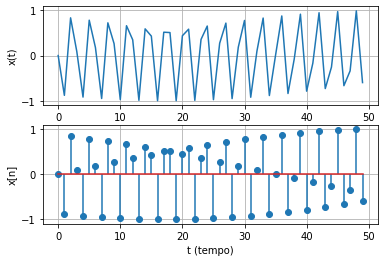

In [90]:
plt.subplot(2,1,1)
plt.plot(n[:50],xn[:50])
plt.grid()
plt.xlabel('t (tempo)')
plt.ylabel('x(t)')

plt.subplot(2,1,2)
plt.stem(n[:50],xn[:50])
plt.grid()
plt.xlabel('t (tempo)')
plt.ylabel('x[n]')

In [91]:
def ctfts(x,T):
    N = len(x)
    X = np.fft.fftshift(np.fft.fft(x,N))*(2*np.pi/N)
    X = np.abs(X)
    w = np.linspace(-1,1-1/N,N)/(2*T)
    return X,w

In [92]:
X,w = ctfts(xn,1/8192)
print(X.shape)


(8192,)


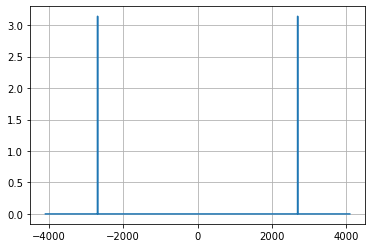

In [93]:
plt.plot(w,X)
plt.grid()

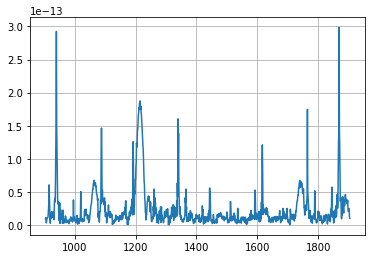

In [94]:
plt.plot(w[5000:6000],X[5000:6000])
plt.grid()

In [95]:
from scipy.io.wavfile import write
write('sine.wav', 8192, xn)

In [96]:
from IPython.display import Audio

In [97]:
from IPython.display import Audio
Audio(xn,rate=8192)

array([False, False, False, False, False,  True, False, False, False,
       False])